In [1]:
import sys, os

from pathlib import Path
from omnibelt import load_csv, load_yaml
from PIL import Image


from scipy.stats import pearsonr
import numpy as np


from html.parser import HTMLParser

from scipy.stats import pearsonr
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta
from omnilearn import util
import omnibelt as belt
from tabulate import tabulate
import networkx as nx
import yfinance as yf

In [2]:
def get_closes(tickers, start, end, ratios=True):
    data = []
    for tick in tickers:
        a_df = yf.download(tick, 
                          start=start, 
                          end=end, 
                          progress=False)
        data.append(a_df['Close'].to_numpy())
        
    try:
        data = np.stack(data)
    except Exception as e:
        print(e)
        
    return data

def show_graph(wts, labels, figsize=(8,8), **kwargs):

    G = nx.from_numpy_matrix(wts, create_using=nx.MultiDiGraph)

    colors = 'C2'
    # colors = ['C2' if i in sel else 'C3' for i in range(len(G))]

    edges,weights = zip(*sorted(nx.get_edge_attributes(G,'weight').items(), key=lambda x: x[-1], reverse=False))

    if 'pos' not in kwargs:
    
        try:
            pos = nx.planar_layout(G)
        except:
        #     pos = nx.spring_layout(G)
            pos = nx.circular_layout(G)
        
        kwargs['pos'] = pos
    kwargs.update(dict(node_color=colors, labels={i:n for i,n in enumerate(labels)},#, with_labels=True,
                  edgelist=edges, edge_color=weights, node_size=200,
                  edge_cmap=plt.get_cmap('binary'), vmin=0))
    plt.figure(figsize=figsize)
    nx.draw(G, **kwargs)
    

In [3]:
year = 2020
year = 2021

startyear, endyear = year, year

startyear, endyear = 2014, 2021

In [4]:
# tickers = ['MSFT', 'AAPL', 'PZZA', 'T', 'FB', 'HD', 'CLX', 'CNQ', 
#                    'WFC', 'JNJ', 'EMR', 'INTC', 'V', 'SHW', 'PSA', 'ED', 
#                    'BA', 'COST']
# tickers = ['FB', 'HD', 'CLX', 'CNQ', 'WFC', 'JNJ', 'EMR', 'INTC', 'V', 'SHW', 'PSA', 'ED', ]
# tickers = ['FB', 'HD', 'CLX', 'CNQ', 'WFC', 'JNJ', 'EMR', 'INTC', 'SHW', 'PSA', ]#'ED', ]
# sectors = ['Comm', 'Disc', 'Stap', 'Ener', 'Fin', 'Heal', 'Ind', 'IT', 'Mat', 'RE', ]#'Util']
# tickers = ['XLE', 'XLF', 'XLU', 'XLI', 'XLK', 'XLV', 'XLY', 'XLP', 'XLB', 'XLRE']
# sectors = ['Ener', 'Fin', 'Util', 'Ind', 'Tech', 'Heal', 'Disc', 'Stap', 'Mat', 'RE', ]

In [5]:
# full = get_closes(tickers, start=f'{year}-01-01', end=f'{year}-12-31', )
# rats = full / full[:,:1]
# full.shape

In [6]:
# plt.figure(figsize=(9,7))
# for n, l in zip(sectors, rats):
#     plt.plot(l,label=n)
# plt.legend();
# plt.tight_layout();

In [7]:
# C = np.cov(rats)
# C.shape

In [8]:
# util.plot_mat(C, val_fmt=2);
# plt.xticks(range(len(tickers)), sectors)
# plt.yticks(range(len(tickers)), sectors)
# plt.tight_layout();

In [9]:
# show_graph(C**3.5, sectors)

In [5]:
info = belt.load_yaml('config/tickers/countries.yaml')
del info['Egypt']
names = list(info)
tickers = [info[t] for t in names]

In [6]:
path = Path(r'C:\Users\anwan\Downloads\world_country_and_usa_states_latitude_and_longitude_values.csv')

In [7]:
raw = load_csv(path)
countries = [row[:4] for row in raw]
lands = np.array(countries)

In [8]:
data = [{'code':c, 'lat': float(lat), 'lon': float(lon), 'name': name} 
        for c, lat, lon, name in lands[1:] if len(lat) and len(lon)]
land_locs = {c['name']:c for c in data}
data[0]

{'code': 'AD', 'lat': 42.546245, 'lon': 1.601554, 'name': 'Andorra'}

In [9]:
content = [land_locs[l] for l in names]
lats, lons = np.array([c['lat'] for c in content]), np.array([c['lon'] for c in content])
lons = lons
lats = lats
content[0]

{'code': 'JP', 'lat': 36.204824, 'lon': 138.252924, 'name': 'Japan'}

In [10]:
# plt.figure(figsize=(9,7))

# plt.scatter(lons, lats, s=50, c='y')
# for la, lo, n in zip(lats, lons, names):
#     plt.text(lo, la, n, ha='center', va='center')

In [11]:
cticks_raw = get_closes(tickers, start=f'{startyear}-01-01', end=f'{endyear}-12-31', )
cticks_raw.shape

(37, 1920)

In [12]:
cdat = cticks_raw / cticks_raw.std(-1,keepdims=True)
# cdat = cticks_raw / cticks_raw[:,:1]
pts = cdat.copy()
cg = np.cov(cdat)
cg.shape

(37, 37)

<IPython.core.display.Javascript object>


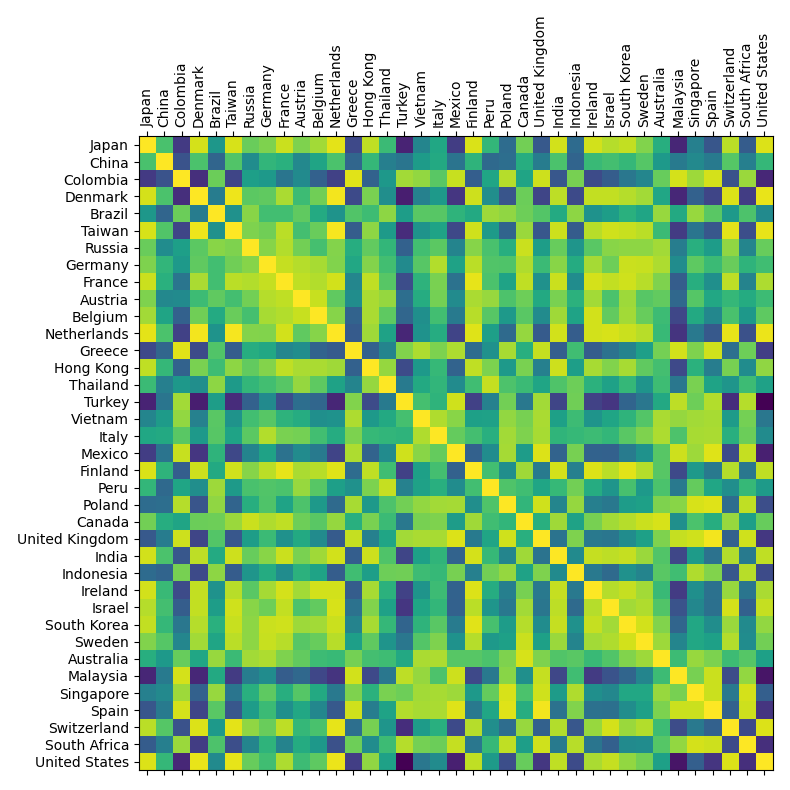

In [13]:
row_labels = names
# util.plot_mat(cg, val_fmt=1, figside=0.2);
util.plot_mat(cg, figside=0.2);
plt.xticks(range(len(tickers)), row_labels, rotation=90)
plt.yticks(range(len(tickers)), row_labels)
plt.tight_layout();

<IPython.core.display.Javascript object>


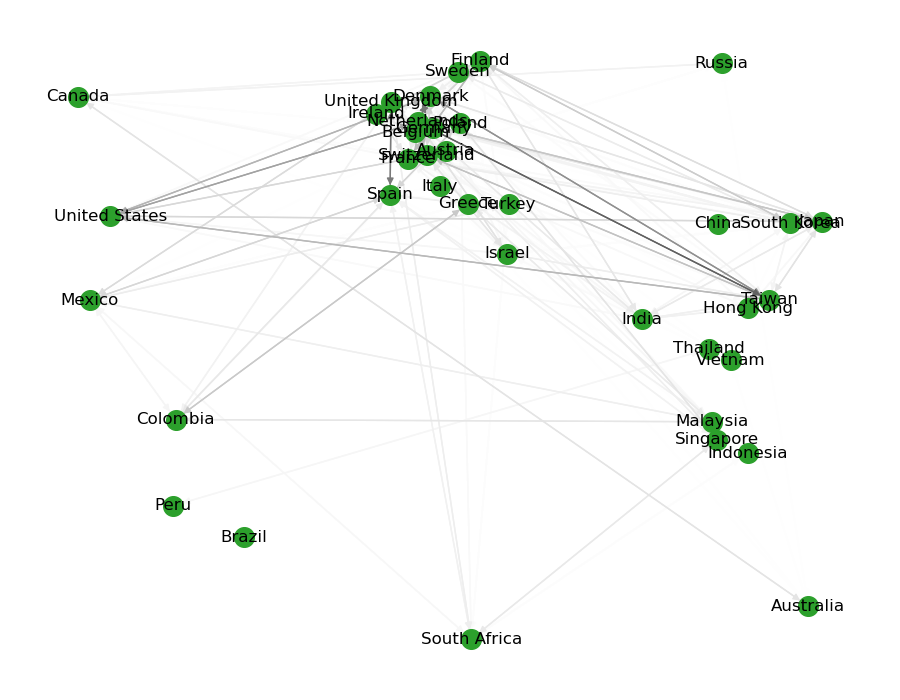

In [14]:
# show_graph(cg**20, names)
show_graph(cg**20, names, pos=np.stack([lons, lats],1), figsize=(9,7))

In [20]:
query = 'Israel'

tbl = sorted(zip(names, cg[names.index(query)]), key=lambda x: x[1], reverse=True)
print(tabulate(tbl))

--------------  ----------
Israel           1.00052
Netherlands      0.895226
Switzerland      0.89055
Taiwan           0.873535
United States    0.848401
Denmark          0.842713
France           0.84092
India            0.827869
Finland          0.820379
Japan            0.809007
Ireland          0.803796
Sweden           0.78984
South Korea      0.761813
Canada           0.760124
Russia           0.689958
Hong Kong        0.671641
Germany          0.613003
Belgium          0.580428
Australia        0.528024
Austria          0.505308
China            0.48142
Italy            0.412444
Vietnam          0.283043
Thailand         0.254349
Brazil           0.230095
Peru             0.167564
Singapore        0.0639406
Poland          -0.0417112
United Kingdom  -0.057479
Greece          -0.0852793
Spain           -0.0959059
Indonesia       -0.137281
Mexico          -0.200107
South Africa    -0.207958
Colombia        -0.227521
Malaysia        -0.291333
Turkey          -0.463706
------------

In [21]:
wts = cg.copy()
wts.sort(1)
wts = wts[:,::-1]

<IPython.core.display.Javascript object>


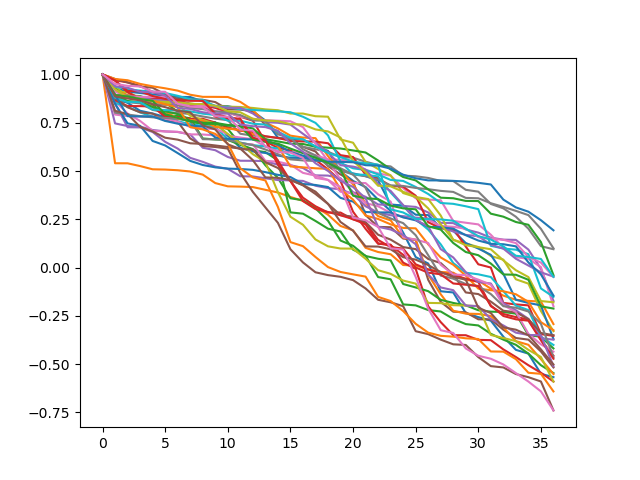

In [22]:
plt.figure()
plt.plot(wts.T);

<IPython.core.display.Javascript object>


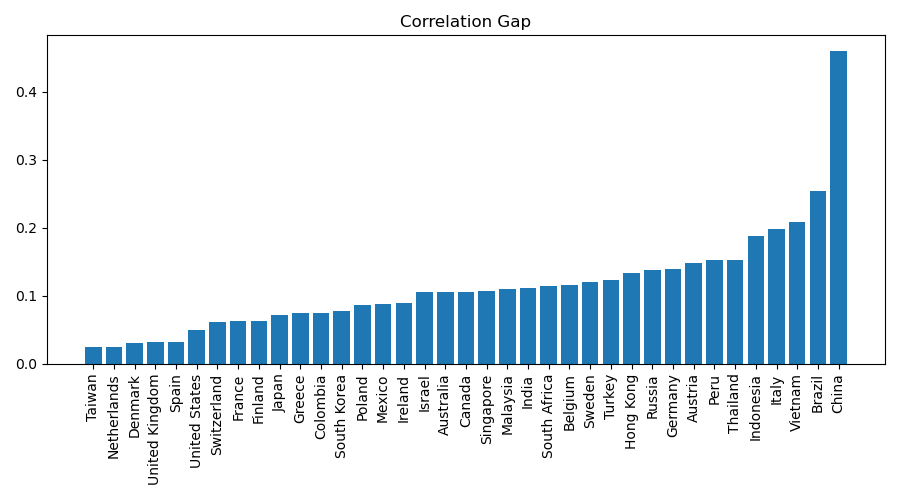

In [23]:
plt.figure(figsize=(9,5))
# gap = wts[:,0]-wts[:,1:4].mean(-1)
gap = wts[:,0]-wts[:,1]
order = gap.argsort()
plt.bar(np.arange(len(wts)), gap[order])
plt.xticks(range(len(tickers)), np.array(row_labels)[order], rotation=90);
plt.title('Correlation Gap')
plt.tight_layout();

In [163]:
import umap
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [160]:
pts.shape

(37, 252)

In [197]:
# reducer = umap.UMAP()

In [198]:
# embedding = reducer.fit_transform(pts)
# embedding.shape

In [199]:
# plt.figure()
# plt.scatter(*embedding.T)
# for xy, n in zip(embedding, names):
#     plt.text(*xy, n, ha='center', va='center')

In [192]:
import numpy as np

from sklearn.cluster import DBSCAN, MeanShift, OPTICS, SpectralClustering
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>


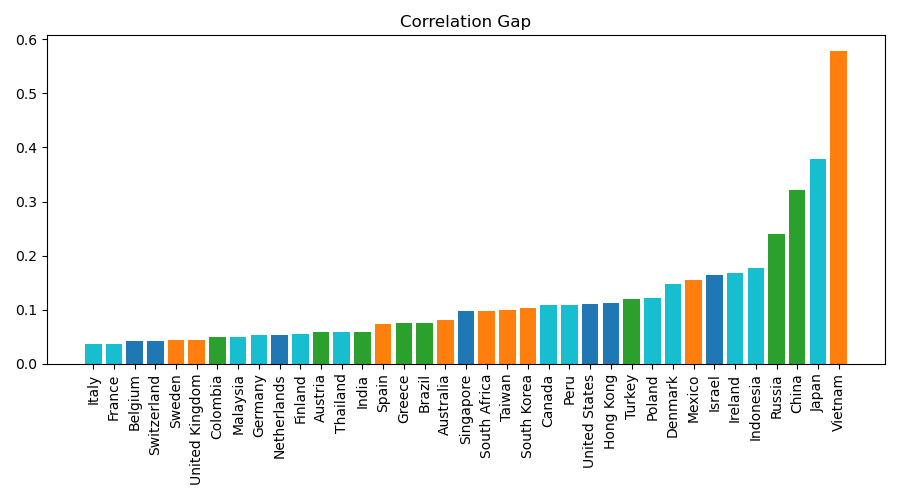

In [200]:
# db = DBSCAN(eps=20)
# db = MeanShift()
db = OPTICS()
# db = umap.UMAP()
# db = SpectralClustering(5)

db.fit(pts)
labels = db.labels_

plt.figure(figsize=(9,5))
# gap = wts[:,0]-wts[:,1]
# order = gap.argsort()
plt.bar(np.arange(len(wts)), gap[order], color=[f'C{i%10}' for i in labels[order]])
plt.xticks(range(len(tickers)), np.array(row_labels)[order], rotation=90);
plt.title('Correlation Gap')
plt.tight_layout();

In [177]:
# Python program to plot
# geographical data using plotly

# importing all necessary libraries
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

# some more libraries to plot graph
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

# To establish connection
init_notebook_mode(connected = True)


# type defined is choropleth to
# plot geographical plots
data = dict(type = 'choropleth',

			# location: Arizoana, California, Newyork
			locations = ['AZ', 'CA', 'NY'],
			
			# States of USA
			locationmode = 'USA-states',
			
			# colorscale can be added as per requirement
			colorscale = 'Portland',
			
			# text can be given anything you like
			text = ['text 1', 'text 2', 'text 3'],
			z = [1.0, 2.0, 3.0],
			colorbar = {'title': 'Colorbar Title Goes Here'})
			
layout = dict(geo ={'scope': 'usa'})

# passing data dictionary as a list
choromap = go.Figure(data = [data], layout = layout)

# plotting graph
iplot(choromap)


ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [178]:
pip install geograpy

Note: you may need to restart the kernel to use updated packages.  Downloading nltk-2.0.4.tar.gz (955 kB)



    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\anwan\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\anwan\\AppData\\Local\\Temp\\pip-install-7w_b8k6m\\newspaper_d05c08ad9bd44e05be29c0fec86e2d93\\setup.py'"'"'; __file__='"'"'C:\\Users\\anwan\\AppData\\Local\\Temp\\pip-install-7w_b8k6m\\newspaper_d05c08ad9bd44e05be29c0fec86e2d93\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\anwan\AppData\Local\Temp\pip-pip-egg-info-ddr9_mib'
         cwd: C:\Users\anwan\AppData\Local\Temp\pip-install-7w_b8k6m\newspaper_d05c08ad9bd44e05be29c0fec86e2d93\
    Complete output (1 lines):
    WARNING! You are attempting to install newspaper's python2 repository on python3. PLEASE RUN `$ pip3 install newspaper3k` for python3 or `$ pip install newspaper` for python2
    ---------------

INFO: pip is looking at multiple versions of <Python from Requires-Python> to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jellyfish to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jellyfish to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. If you want to abort this run, you can press Ctrl + C to do so. To improve how pip performs, tell us what happened here: https://pip.pypa.io/surveys/backtracking
INFO: pip is looking at multiple versions of geograpy to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of <Python from Requires-Python> to determine which versio


         cwd: C:\Users\anwan\AppData\Local\Temp\pip-install-7w_b8k6m\nltk_1de0d6be628641589cf13a9dd05f0a50\
    Complete output (31 lines):
    Traceback (most recent call last):
      File "C:\Users\anwan\AppData\Local\Temp\pip-install-7w_b8k6m\nltk_1de0d6be628641589cf13a9dd05f0a50\distribute_setup.py", line 143, in use_setuptools
        raise ImportError
    ImportError
    
    During handling of the above exception, another exception occurred:
    
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\anwan\AppData\Local\Temp\pip-install-7w_b8k6m\nltk_1de0d6be628641589cf13a9dd05f0a50\setup.py", line 23, in <module>
        distribute_setup.use_setuptools()
      File "C:\Users\anwan\AppData\Local\Temp\pip-install-7w_b8k6m\nltk_1de0d6be628641589cf13a9dd05f0a50\distribute_setup.py", line 145, in use_setuptools
        return _do_download(version, download_base, to_dir, download_delay)
      File "C:\Users\anwan\AppData\Local\Temp\pip

In [2]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [4]:
get_continent('Belgium')

('BE', 'EU')

In [11]:
import numpy as np
import pandas as pd

In [12]:
df = pd.DataFrame()

In [6]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-test")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [7]:
geolocate('Belgium')

(50.6402809, 4.6667145)

In [8]:
countries = ['Belgium', 'China', 'Japan', 'Russia', 'Chad', 'Mexico', 'Argentina', 'Austria', 'Norway']

In [9]:
lats, lons = zip(*[geolocate(x) for x in countries])
len(lats), len(lons)

(9, 9)

In [13]:
df['Country'] = countries
df['Latitude'] = lats
df['Longitude'] = lons

In [16]:
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df)):
        lat = df.iloc[i]['Latitude']
        long = df.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(df.iloc[i]['Country'],
                                   df.iloc[i]['Country']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

In [17]:
df

,Country,Latitude,Longitude
0,Belgium,50.640281,4.666715
1,China,35.000074,104.999927
2,Japan,36.574844,139.239418
3,Russia,64.686314,97.745306
4,Chad,15.613414,19.015617
5,Mexico,22.500048,-100.000037
6,Argentina,-34.996496,-64.967282
7,Austria,47.200000,13.200000
8,Norway,60.500021,9.099972


In [18]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

In [22]:
#opening the vector map
shp_path = "\\District_Boundary.shp"
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

ShapefileException: Unable to open \District_Boundary.dbf or \District_Boundary.shp.

In [48]:
path = Path(r'C:\Users\anwan\Downloads\world_country_and_usa_states_latitude_and_longitude_values.csv')

In [49]:
raw = load_csv(path)

In [51]:
raw = load_csv(path)
countries = [row[:4] for row in raw]
lands = np.array(countries)
lands.shape

(246, 4)

In [52]:
lands

array([['country_code', 'latitude', 'longitude', 'country'],
       ['AD', '42.546245', '1.601554', 'Andorra'],
       ['AE', '23.424076', '53.847818', 'United Arab Emirates'],
       ['AF', '33.93911', '67.709953', 'Afghanistan'],
       ['AG', '17.060816', '-61.796428', 'Antigua and Barbuda'],
       ['AI', '18.220554', '-63.068615', 'Anguilla'],
       ['AL', '41.153332', '20.168331', 'Albania'],
       ['AM', '40.069099', '45.038189', 'Armenia'],
       ['AN', '12.226079', '-69.060087', 'Netherlands Antilles'],
       ['AO', '-11.202692', '17.873887', 'Angola'],
       ['AQ', '-75.250973', '-0.071389', 'Antarctica'],
       ['AR', '-38.416097', '-63.616672', 'Argentina'],
       ['AS', '-14.270972', '-170.132217', 'American Samoa'],
       ['AT', '47.516231', '14.550072', 'Austria'],
       ['AU', '-25.274398', '133.775136', 'Australia'],
       ['AW', '12.52111', '-69.968338', 'Aruba'],
       ['AZ', '40.143105', '47.576927', 'Azerbaijan'],
       ['BA', '43.915886', '17.679076', 

In [53]:
mpath = Path(r'C:\Users\anwan\OneDrive\Khan\projects\digi-diplo\extra\blank_maps\R759cbccf49bfd855fc9fa5279c1975ea.png')

In [56]:
im = np.array(Image.open(mpath))

In [68]:
data = [{'code':c, 'lat': float(lat), 'lon': float(lon), 'name': name} 
        for c, lat, lon, name in lands[1:] if len(lat) and len(lon)]
data[0]

{'code': 'AD', 'lat': 42.546245, 'lon': 1.601554, 'name': 'Andorra'}

In [71]:
codes, names, lats, lons = ([x['code'] for x in data], [x['name'] for x in data],
                            [x['lat'] for x in data], [x['lon'] for x in data])
lats, lons = np.array(lats), np.array(lons)

In [89]:
scale = 15
plt.scatter(scale*lons + 1850, -scale*lats + 1286)

<IPython.core.display.Javascript object>


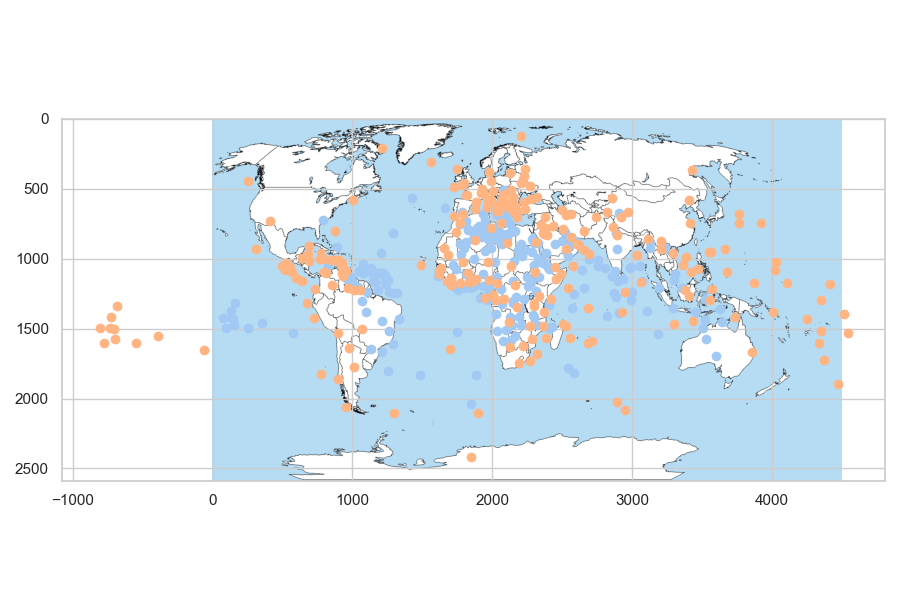

In [87]:
plt.figure(figsize=(9,6))
plt.imshow(im);



plt.tight_layout()